## EDA
### Mass Shootings

In [92]:
df_mass = read.csv("gunviolencearchive_mass_shooting_all_years.csv")
# drop Operation column
df_mass = subset(df_mass, select = -c(Operations))

# convert Incident.Date to Date type 
df_mass$Incident.Date = as.Date(df_mass$Incident.Date, format="%B %d, %Y")

# extract Year, Month, Day from Incident.Date
df_mass$Year = as.integer(format(df_mass$Incident.Date, "%Y"))
df_mass$Month = format(df_mass$Incident.Date, "%B")
df_mass$Day = as.integer(format(df_mass$Incident.Date, "%d"))

# concatenate Victims.Injured and Victims.Killed into a new column Victims.Total
df_mass$Victims.Total = df_mass$Victims.Injured + df_mass$Victims.Killed

# concatenate Suspect.Injured and Suspect.Killed and Suspects.Arrested into a new column Suspects.Total
df_mass$Suspects.Total = df_mass$Suspects.Killed + df_mass$Suspects.Injured + df_mass$Suspects.Arrested

# display first few rows of the cleaned dataframe
head(df_mass)

,Incident.ID,Incident.Date,State,City.Or.County,Address,Victims.Killed,Victims.Injured,Suspects.Killed,Suspects.Injured,Suspects.Arrested,Year,Month,Day,Victims.Total,Suspects.Total
,<int>,<date>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,3106715,2024-12-31,California,Oakland,200 block of Second St,1,3,0,0,0,2024,December,31,4,0
2,3107076,2024-12-31,Mississippi,Natchez,Finger Ln and Lower Woodville Rd,1,5,0,0,1,2024,December,31,6,1
3,3105091,2024-12-30,New York,Bronx,3544 White Plains Rd,0,6,0,0,0,2024,December,30,6,0
4,3105154,2024-12-30,New York,Rochester,100 block of Hollenbeck St,0,4,0,0,0,2024,December,30,4,0
5,3103855,2024-12-28,West Virginia,Grantsville,5957 Pine Creek Rd,2,2,0,0,1,2024,December,28,4,1
6,3104385,2024-12-28,California,Signal Hill,1005 E Burnett St,1,6,0,0,0,2024,December,28,7,0


### Summary Stats:
#### mean and medium per year, state, season

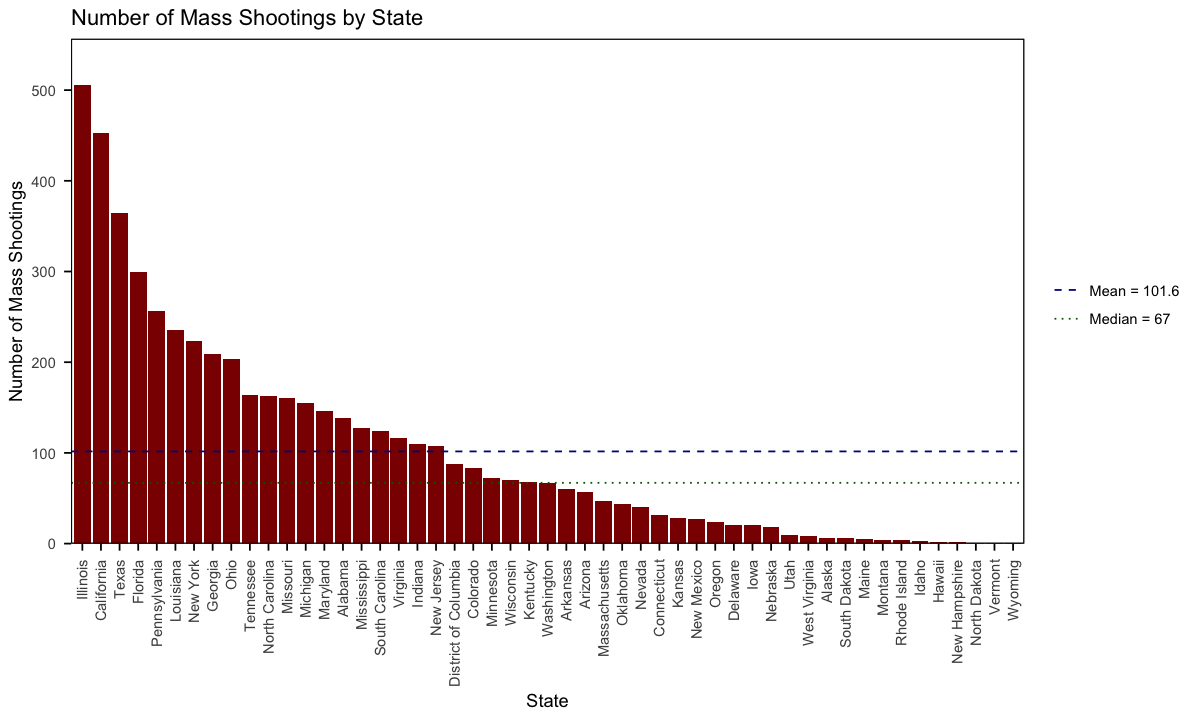

In [119]:
# compute mean number of mass shootings per state
state_freq = table(df_mass$State)
mean_state = mean(as.numeric(state_freq))
median_state = median(as.numeric(state_freq))

# plot number of mass shootings by state
library(ggplot2)
library(dplyr)
library(forcats)
library(grid)
options(repr.plot.width = 10, repr.plot.height = 6)

state_counts <- ggplot(df_mass, aes(x = fct_infreq(State))) + 
    geom_bar(fill = "darkred") +

    # draw mean and median lines
    geom_hline(aes(yintercept = mean_state, color = "Mean"), linetype = "dashed", linewidth = 0.5) +
    geom_hline(aes(yintercept = median_state, color = "Median"), linetype = "dotted", linewidth = 0.5) +

    # unified color scale for both lines
    scale_color_manual(
        name = "",
        breaks = c("Mean", "Median"),
        labels = c(paste0("Mean = ", round(mean_state, 1)),
                   paste0("Median = ", round(median_state, 1))),
        values = c("Mean" = "darkblue", "Median" = "darkgreen")
    ) +
    guides(color = guide_legend(override.aes = list(linetype = c("dashed", "dotted"), size = c(1, 1)))) +

    # keep full data and give a 10% top margin so mean line doesn't touch the top
    scale_y_continuous(expand = c(0, 0)) +
    coord_cartesian(ylim = c(0, max(as.numeric(state_freq), na.rm = TRUE) * 1.10)) +
    theme_minimal() +
    theme(panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"),
        panel.border = element_rect(colour = "black", linewidth = 0.5),
        axis.ticks = element_line(colour = "black"),
        axis.ticks.length = unit(0.15, "cm"),
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) + 
    labs(title = "Number of Mass Shootings by State", x = "State", y = "Number of Mass Shootings")
state_counts

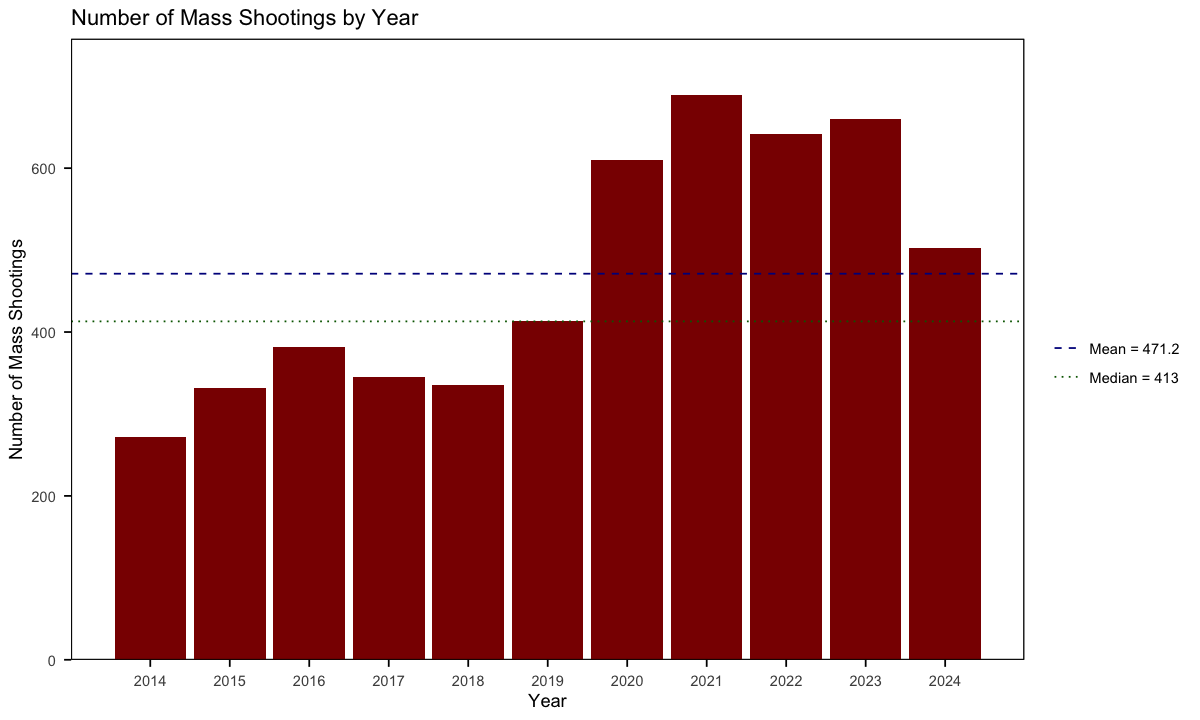

In [120]:
# compute mean number of mass shootings per year
year_freq = table(df_mass$Year)
mean_year = mean(as.numeric(year_freq))
median_year = median(as.numeric(year_freq))

# create sequence of all years for x-axis ticks
year_seq <- seq(min(df_mass$Year, na.rm = TRUE), max(df_mass$Year, na.rm = TRUE), by = 1)

# plot number of mass shootings by year
options(repr.plot.width = 10, repr.plot.height = 6)

year_counts <- ggplot(df_mass, aes(x = Year)) + 
    geom_bar(fill = "darkred") +
    
    # draw mean and median lines
    geom_hline(aes(yintercept = mean_year, color = "Mean"), linetype = "dashed", linewidth = 0.5) +
    geom_hline(aes(yintercept = median_year, color = "Median"), linetype = "dotted", linewidth = 0.5) +

    # unified color scale for both lines
    scale_color_manual(
        name = "",
        breaks = c("Mean", "Median"),
        labels = c(paste0("Mean = ", round(mean_year, 1)),
                   paste0("Median = ", round(median_year, 1))),
        values = c("Mean" = "darkblue", "Median" = "darkgreen")
    ) +
    guides(color = guide_legend(override.aes = list(linetype = c("dashed", "dotted"), size = c(1, 1)))) +


    # force a tick/label for every single year
    scale_x_continuous(breaks = year_seq) +
    # show full data but give a small top margin so mean line doesn't touch the top
    scale_y_continuous(expand = c(0, 0)) +
    coord_cartesian(ylim = c(0, max(as.numeric(year_freq), na.rm = TRUE) * 1.10)) +
    theme_minimal() +
    theme(panel.grid = element_blank(),
            panel.background = element_rect(fill = "white"),
            panel.border = element_rect(colour = "black", size = 0.5),
            axis.ticks = element_line(colour = "black"),
            axis.ticks.length = unit(0.15, "cm"))+ 
    labs(title = "Number of Mass Shootings by Year", x = "Year", y = "Number of Mass Shootings")
year_counts

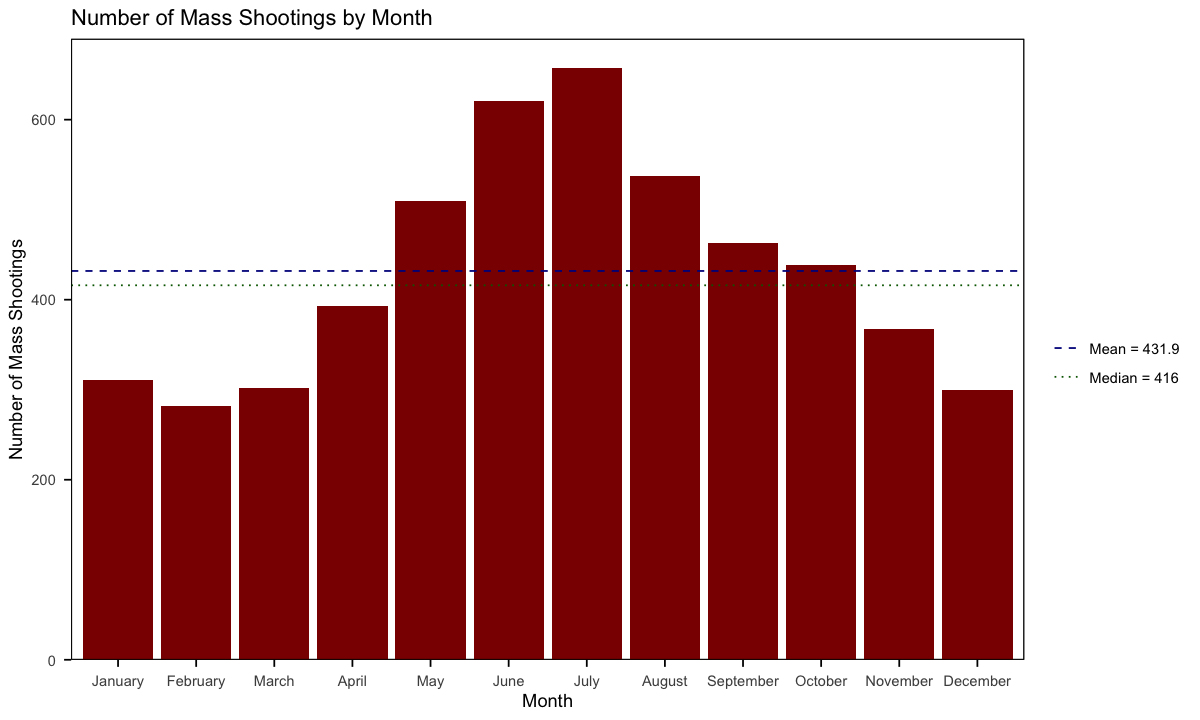

In [121]:
# compute mean number of mass shootings per month
month_freq = table(df_mass$Month)
mean_month = mean(as.numeric(month_freq))
median_month = median(as.numeric(month_freq))

# plot number of mass shootings by month
options(repr.plot.width = 10, repr.plot.height = 6)

month_counts <- ggplot(df_mass, aes(x  = fct_rev(fct_inorder(Month)))) + 
    geom_bar(fill = "darkred") +
    
    # draw mean and median lines
    geom_hline(aes(yintercept = mean_month, color = "Mean"), linetype = "dashed", linewidth = 0.5) +
    geom_hline(aes(yintercept = median_month, color = "Median"), linetype = "dotted", linewidth = 0.5) +

    # unified color scale for both lines
    scale_color_manual(
        name = "",
        breaks = c("Mean", "Median"),
        labels = c(paste0("Mean = ", round(mean_month, 1)),
                   paste0("Median = ", round(median_month, 1))),
        values = c("Mean" = "darkblue", "Median" = "darkgreen")
    ) +
    guides(color = guide_legend(override.aes = list(linetype = c("dashed", "dotted"), size = c(1, 1)))) +

    # show full data but give a small top margin so mean line doesn't touch the top
    scale_y_continuous(expand = c(0, 0)) +
    coord_cartesian(ylim = c(0, max(as.numeric(month_freq), na.rm = TRUE) * 1.05)) +
    theme_minimal() +
    theme(panel.grid = element_blank(),
            panel.background = element_rect(fill = "white"),
            panel.border = element_rect(colour = "black", size = 0.5),
            axis.ticks = element_line(colour = "black"),
            axis.ticks.length = unit(0.15, "cm"))+ 
    labs(title = "Number of Mass Shootings by Month", x = "Month", y = "Number of Mass Shootings")
month_counts

In [96]:
df_mass$Season <- fct_collapse(df_mass$Month,
    Winter = c("January","February","March"),
    Spring = c("April","May","June"),
    Summer = c("July","August","September"),
    Fall   = c("October","November","December")
)
head(df_mass)

,Incident.ID,Incident.Date,State,City.Or.County,Address,Victims.Killed,Victims.Injured,Suspects.Killed,Suspects.Injured,Suspects.Arrested,Year,Month,Day,Victims.Total,Suspects.Total,Season
,<int>,<date>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<fct>
1,3106715,2024-12-31,California,Oakland,200 block of Second St,1,3,0,0,0,2024,December,31,4,0,Fall
2,3107076,2024-12-31,Mississippi,Natchez,Finger Ln and Lower Woodville Rd,1,5,0,0,1,2024,December,31,6,1,Fall
3,3105091,2024-12-30,New York,Bronx,3544 White Plains Rd,0,6,0,0,0,2024,December,30,6,0,Fall
4,3105154,2024-12-30,New York,Rochester,100 block of Hollenbeck St,0,4,0,0,0,2024,December,30,4,0,Fall
5,3103855,2024-12-28,West Virginia,Grantsville,5957 Pine Creek Rd,2,2,0,0,1,2024,December,28,4,1,Fall
6,3104385,2024-12-28,California,Signal Hill,1005 E Burnett St,1,6,0,0,0,2024,December,28,7,0,Fall


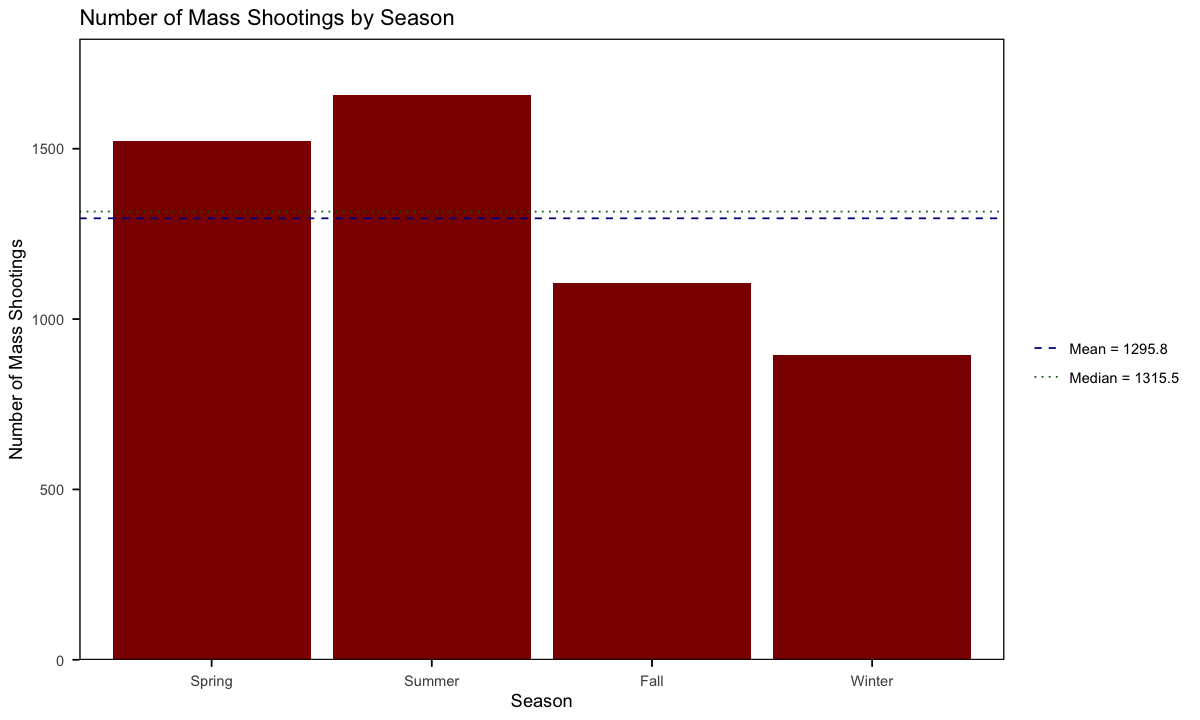

In [ ]:
# computing mean number of mass shootings per season (JFM, AMJ, JAS, OND)
season_freq = table(df_mass$Season)
mean_season = mean(as.numeric(season_freq))
median_season = median(as.numeric(season_freq))

# plot number of mass shootings by season
options(repr.plot.width = 10, repr.plot.height = 6)

season_counts <- ggplot(df_mass, aes(x  = Season)) + 
    geom_bar(fill = "darkred") +

    # draw mean and median lines
    geom_hline(aes(yintercept = mean_season, color = "Mean"), linetype = "dashed", linewidth = 0.5) +
    geom_hline(aes(yintercept = median_season, color = "Median"), linetype = "dotted", linewidth = 0.5) +

    # unified color scale for both lines
    scale_color_manual(
        name = "",
        breaks = c("Mean", "Median"),
        labels = c(paste0("Mean = ", round(mean_season, 1)),
                   paste0("Median = ", round(median_season, 1))),
        values = c("Mean" = "darkblue", "Median" = "darkgreen")
    ) +
    guides(color = guide_legend(override.aes = list(linetype = c("dashed", "dotted"), size = c(1, 1)))) +

    # show full data but give a 10% top margin so mean line doesn't touch the top
    scale_y_continuous(expand = c(0, 0)) +
    coord_cartesian(ylim = c(0, max(as.numeric(season_freq), na.rm = TRUE) * 1.10)) +
    theme_minimal() +
    theme(panel.grid = element_blank(),
            panel.background = element_rect(fill = "white"),
            panel.border = element_rect(colour = "black", size = 0.5),
            axis.ticks = element_line(colour = "black"),
            axis.ticks.length = unit(0.15, "cm"))+ 
    labs(title = "Number of Mass Shootings by Season", x = "Season", y = "Number of Mass Shootings")
season_counts


### Extra plots if needed for future use

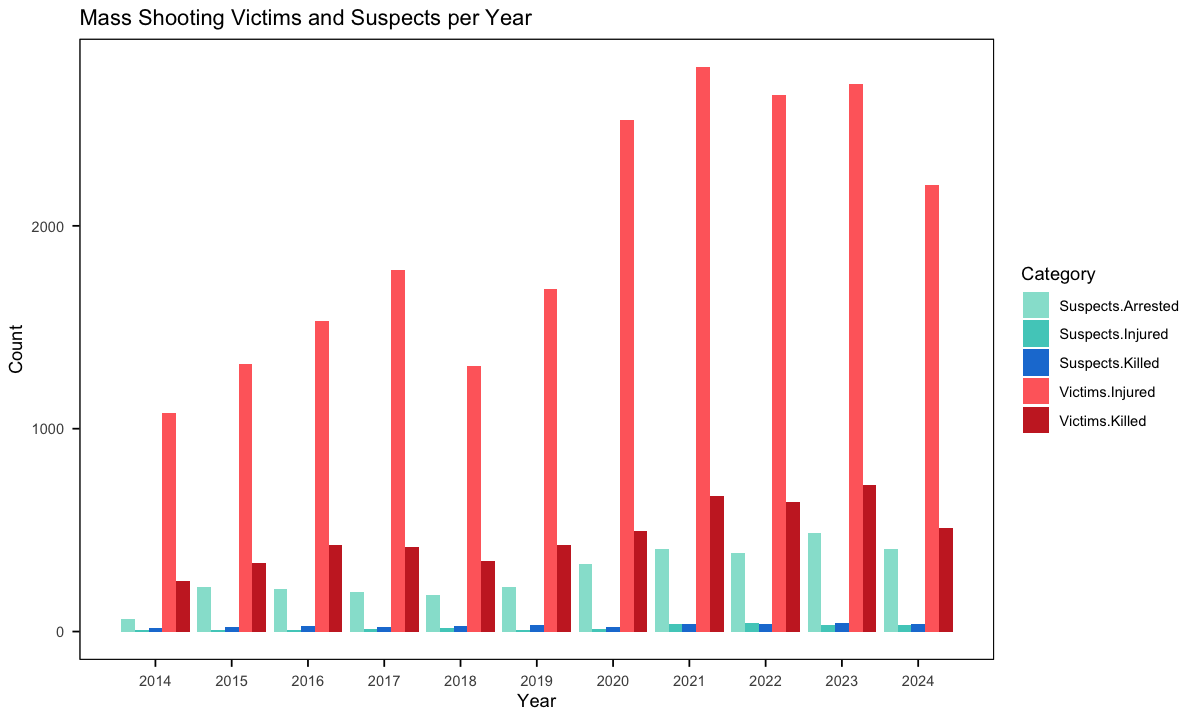

In [98]:
# pick the columns you care about
cols_of_interest <- c("Victims.Injured", "Victims.Killed", "Suspects.Killed", "Suspects.Injured", "Suspects.Arrested")

# group by year and sum counts
library(dplyr)
library(tidyr)
yearly <- df_mass %>%
  group_by(Year) %>%
  summarise(across(all_of(cols_of_interest), \(x) sum(x, na.rm = TRUE)), .groups = 'drop')

# reshape into long format
yearly_melted <- yearly %>%
  pivot_longer(cols = all_of(cols_of_interest),
               names_to = "Category",
               values_to = "Count")

# plot
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)

victims_suspects_plot <- ggplot(yearly_melted, aes(x = Year, y = Count, fill = Category)) +
  geom_col(position = "dodge") +
  # force a tick/label for every single year
  scale_x_continuous(breaks = year_seq) +
  scale_fill_manual(values = c("Victims.Injured" = "#FF6B6B",
                               "Victims.Killed" = "#C92A2A",
                               "Suspects.Killed" = "#1C7ED6",
                               "Suspects.Injured" = "#4ECDC4",
                               "Suspects.Arrested" = "#95E1D3")) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"),
        panel.border = element_rect(colour = "black", size = 0.5),
        axis.ticks = element_line(colour = "black"),
        axis.ticks.length = unit(0.15, "cm"),
        legend.position = "right") +
  labs(title = "Mass Shooting Victims and Suspects per Year",
       x = "Year",
       y = "Count",
       fill = "Category")

victims_suspects_plot

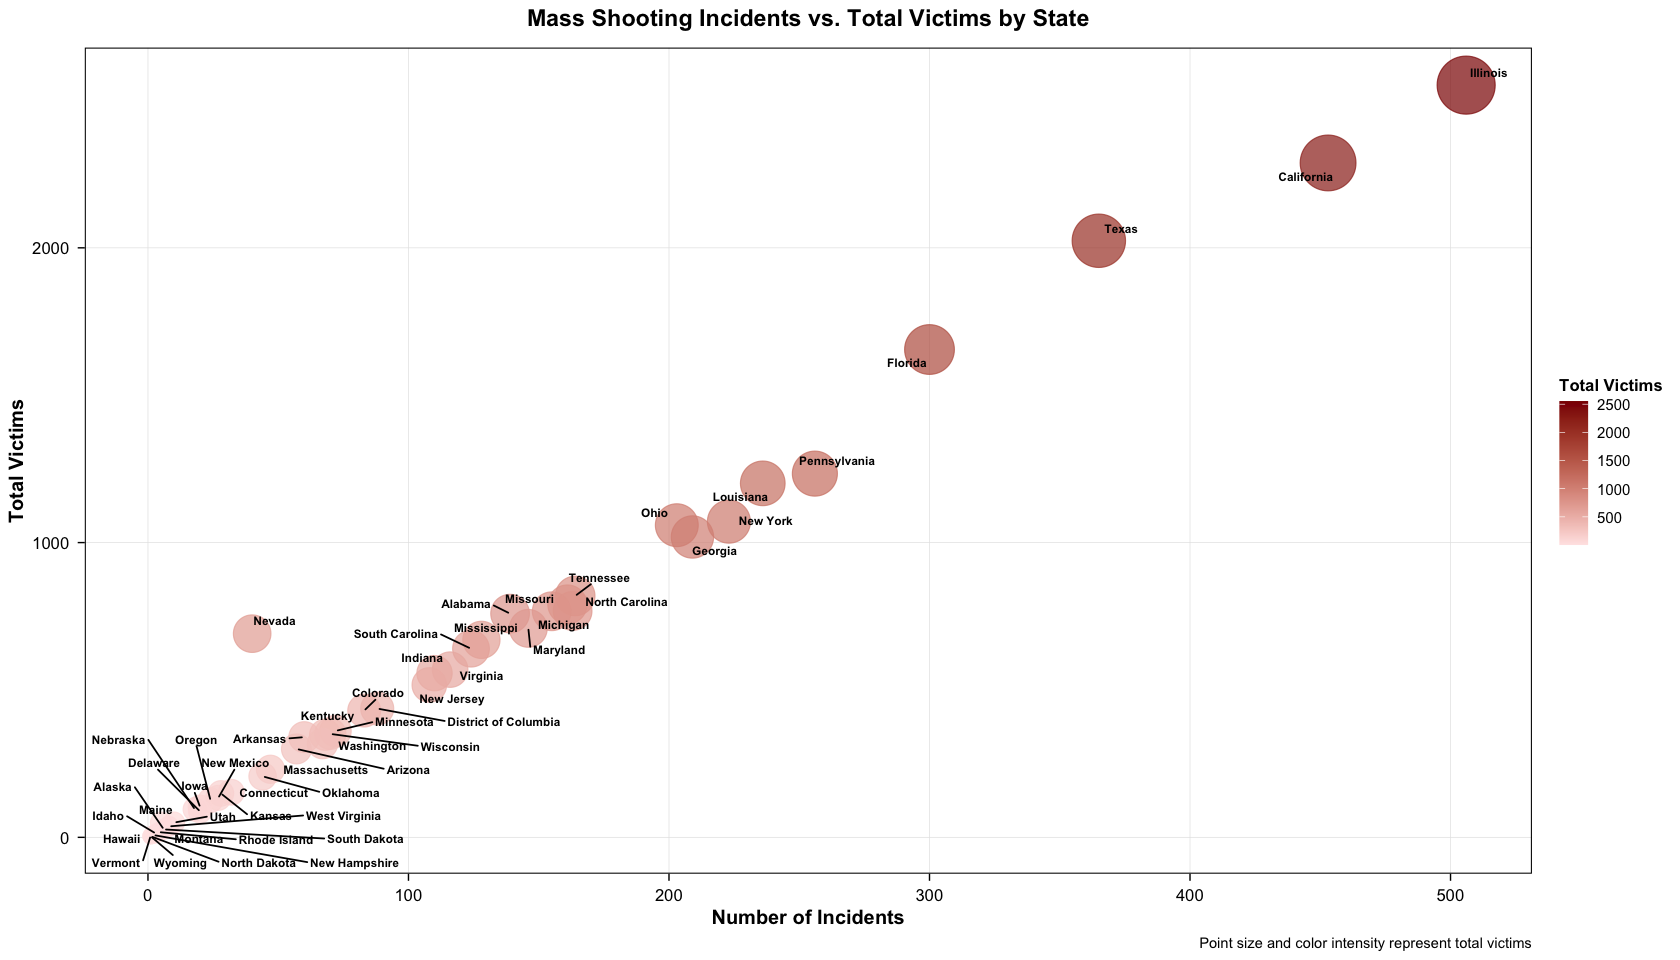

In [99]:
# Plot 2: Incidents vs. Total Victims by State (scatter with size encoding)
library(ggplot2)
library(dplyr)

# aggregate by state: count incidents and sum total victims
state_agg <- df_mass %>%
  group_by(State) %>%
  summarise(
    Incidents = n(),
    Total.Victims = sum(Victims.Total, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  arrange(desc(Total.Victims))

# plot incidents vs total victims with state size encoding
options(repr.plot.width = 14, repr.plot.height = 8)

incidents_vs_victims <- ggplot(state_agg, aes(x = Incidents, y = Total.Victims)) +
  geom_point(aes(size = Total.Victims, color = Total.Victims), alpha = 0.7) +
  # add state labels to points
  ggrepel::geom_text_repel(aes(label = State), size = 2.5, max.overlaps = Inf, 
                           fontface = "bold", box.padding = 0.3) +
  scale_size_continuous(name = "Total Victims", range = c(4, 16), guide = "none") +
  scale_color_gradient(name = "Total Victims", low = "#FFE5E5", high = "#8B0000", guide = "colorbar") +
  theme_minimal() +
  theme(panel.grid.major = element_line(colour = "grey90", linewidth = 0.2),
        panel.grid.minor = element_blank(),
        panel.background = element_rect(fill = "white", colour = NA),
        panel.border = element_rect(colour = "black", linewidth = 0.6, fill = NA),
        axis.ticks = element_line(colour = "black", linewidth = 0.4),
        axis.ticks.length = unit(0.15, "cm"),
        axis.text = element_text(size = 10, colour = "black"),
        axis.title = element_text(size = 12, face = "bold"),
        plot.title = element_text(size = 14, face = "bold", hjust = 0.5, margin = margin(b = 10)),
        legend.position = "right",
        legend.title = element_text(size = 10, face = "bold"),
        legend.text = element_text(size = 9)) +
  labs(title = "Mass Shooting Incidents vs. Total Victims by State",
       x = "Number of Incidents",
       y = "Total Victims",
       caption = "Point size and color intensity represent total victims")

incidents_vs_victims

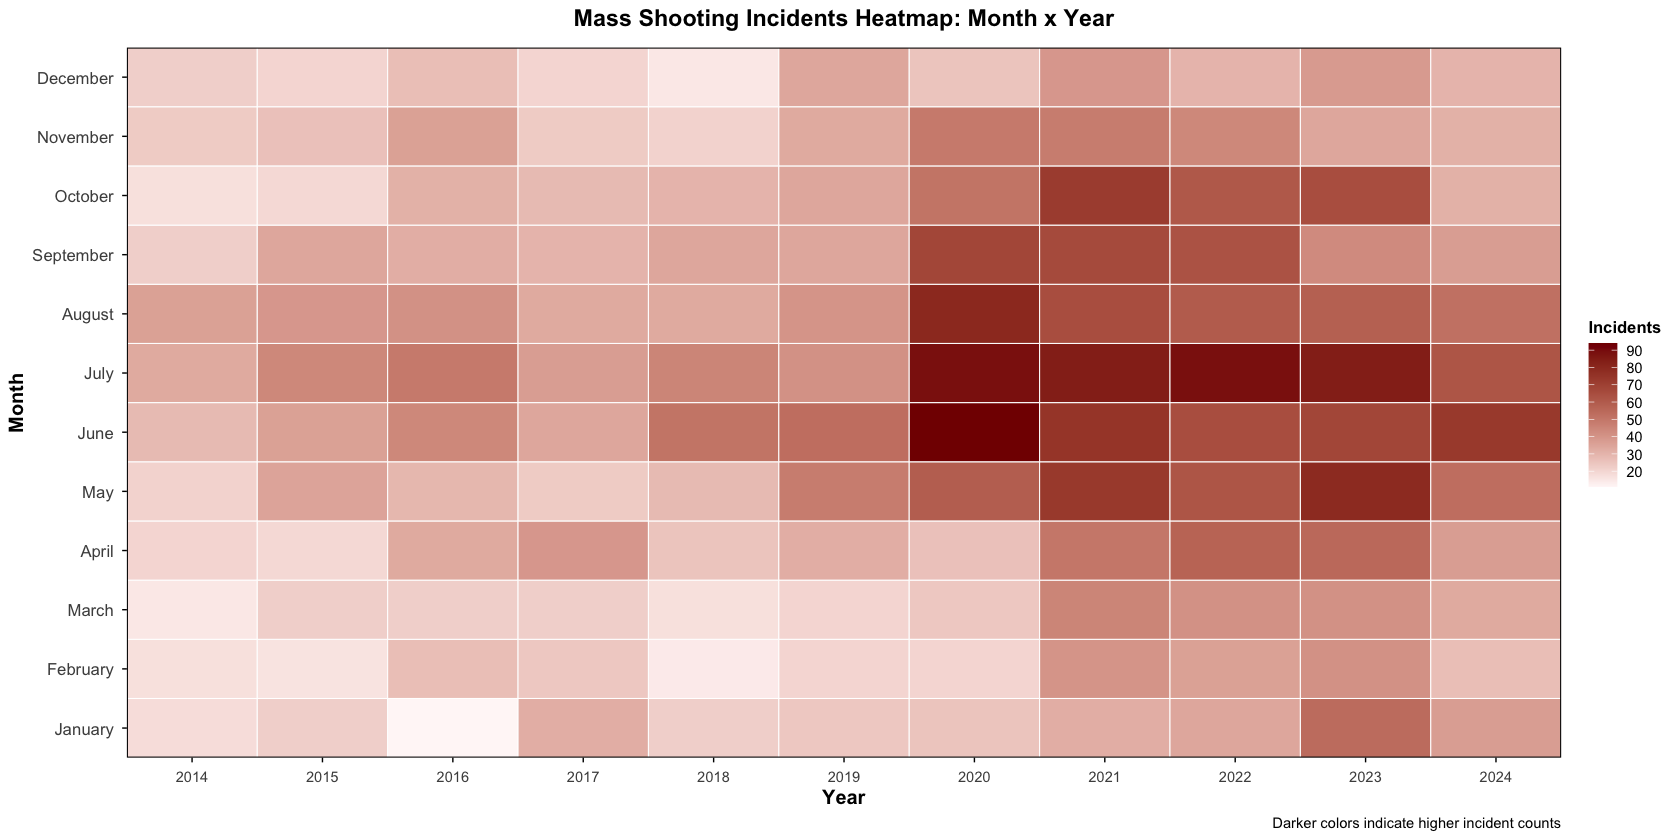

In [100]:
# Plot 3: Heatmap of Mass Shooting Incidents by Month x Year
library(ggplot2)
library(dplyr)
library(tidyr)

# create a cross-tabulation of Year x Month
month_order <- c("January", "February", "March", "April", "May", "June",
                 "July", "August", "September", "October", "November", "December")

heatmap_data <- df_mass %>%
  group_by(Year, Month) %>%
  summarise(Incidents = n(), .groups = 'drop') %>%
  complete(Year, Month = factor(Month, levels = month_order), fill = list(Incidents = 0)) %>%
  mutate(Month = factor(Month, levels = month_order))

# plot heatmap
options(repr.plot.width = 14, repr.plot.height = 7)

heatmap_plot <- ggplot(heatmap_data, aes(x = Year, y = Month, fill = Incidents)) +
  geom_tile(colour = "white", linewidth = 0.3) +
  scale_fill_gradient(name = "Incidents", low = "#fff7f7ff", high = "#830000ff", 
                      breaks = scales::pretty_breaks(n = 6)) +
  scale_x_continuous(breaks = year_seq, expand = c(0, 0)) +
  scale_y_discrete(expand = c(0, 0)) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        panel.background = element_rect(fill = "white", colour = NA),
        panel.border = element_rect(colour = "black", linewidth = 0.6, fill = NA),
        axis.ticks = element_line(colour = "black", linewidth = 0.4),
        axis.ticks.length = unit(0.1, "cm"),
        axis.text.y = element_text(size = 10),
        axis.title = element_text(size = 12, face = "bold"),
        plot.title = element_text(size = 14, face = "bold", hjust = 0.5, margin = margin(b = 10)),
        legend.position = "right",
        legend.title = element_text(size = 10, face = "bold")) +
  labs(title = "Mass Shooting Incidents Heatmap: Month x Year",
       x = "Year",
       y = "Month",
       caption = "Darker colors indicate higher incident counts")

heatmap_plot

Warning message:
“Removed 50 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


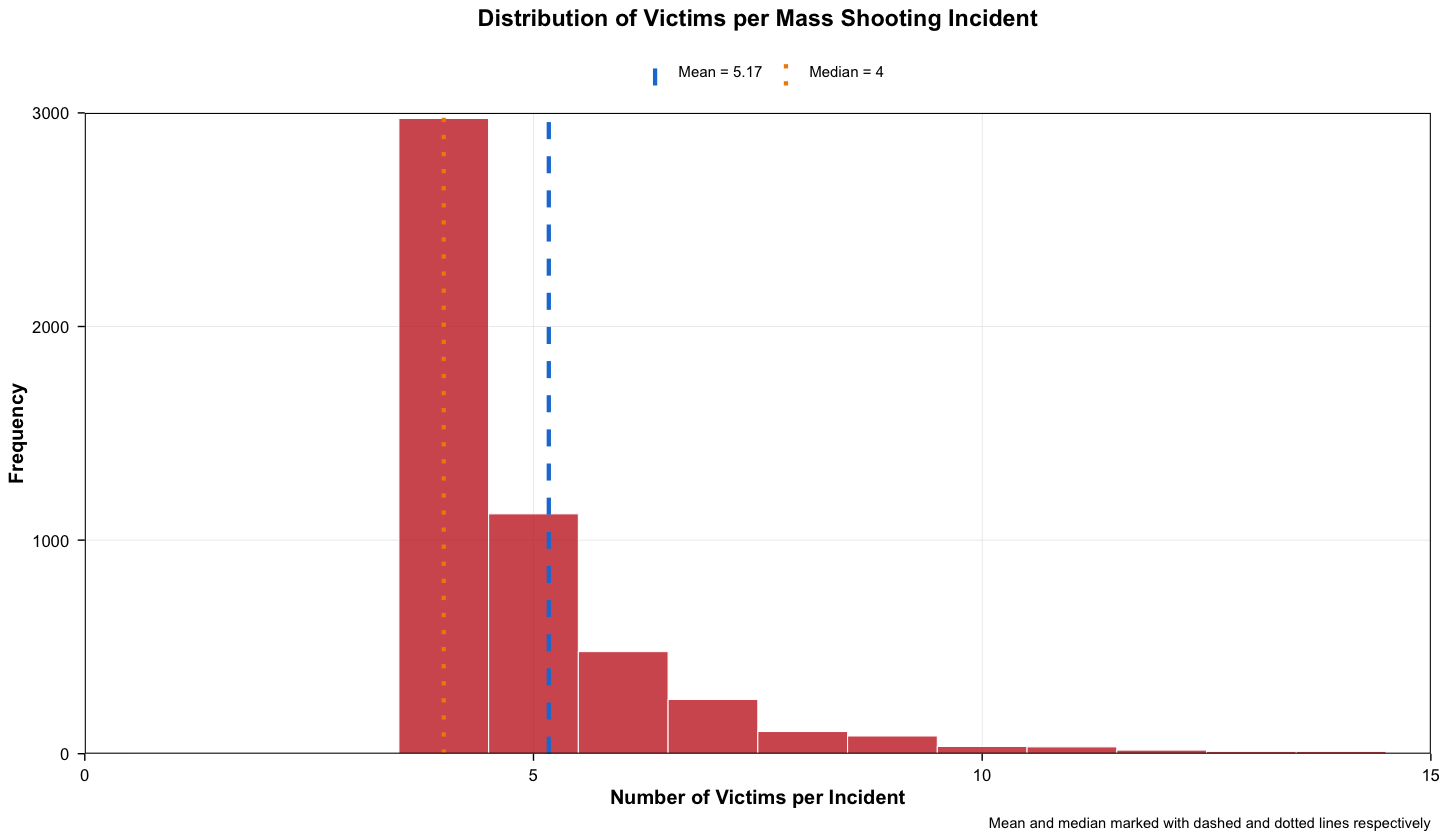

In [101]:
# Plot 4: Distribution of Victims per Incident (histogram)
library(ggplot2)
library(dplyr)

# compute statistics for the distribution
victims_stats <- df_mass %>%
  summarise(
    Mean = mean(Victims.Total, na.rm = TRUE),
    Median = median(Victims.Total, na.rm = TRUE)
  )

# plot histogram of victims per incident
options(repr.plot.width = 12, repr.plot.height = 7)

distribution_plot <- ggplot(df_mass, aes(x = Victims.Total)) +
  geom_histogram(binwidth = 1, fill = "#C92A2A", color = "white", linewidth = 0.3, alpha = 0.8) +
  # add mean line
  geom_vline(aes(xintercept = Mean, color = "Mean"), data = victims_stats,
             linetype = "dashed", linewidth = 1.2) +
  # add median line
  geom_vline(aes(xintercept = Median, color = "Median"), data = victims_stats,
             linetype = "dotted", linewidth = 1.2) +
  scale_color_manual(name = "", 
                     values = c(Mean = "#1C7ED6", Median = "#F08C00"),
                     labels = c(Mean = paste0("Mean = ", round(victims_stats$Mean, 2)),
                               Median = paste0("Median = ", round(victims_stats$Median, 2)))) +
  scale_x_continuous(expand = c(0, 0), limits = c(0, 15)) +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 3000)) +
  coord_cartesian(ylim = c(0, NA)) +
  theme_minimal() +
  theme(panel.grid.major = element_line(colour = "grey90", linewidth = 0.2),
        panel.grid.minor = element_blank(),
        panel.background = element_rect(fill = "white", colour = NA),
        panel.border = element_rect(colour = "black", linewidth = 0.6, fill = NA),
        axis.ticks = element_line(colour = "black", linewidth = 0.4),
        axis.ticks.length = unit(0.15, "cm"),
        axis.text = element_text(size = 10, colour = "black"),
        axis.title = element_text(size = 12, face = "bold"),
        plot.title = element_text(size = 14, face = "bold", hjust = 0.5, margin = margin(b = 10)),
        legend.position = "top",
        legend.title = element_text(size = 10, face = "bold"),
        legend.text = element_text(size = 9)) +
  labs(title = "Distribution of Victims per Mass Shooting Incident",
       x = "Number of Victims per Incident",
       y = "Frequency",
       caption = "Mean and median marked with dashed and dotted lines respectively")

distribution_plot

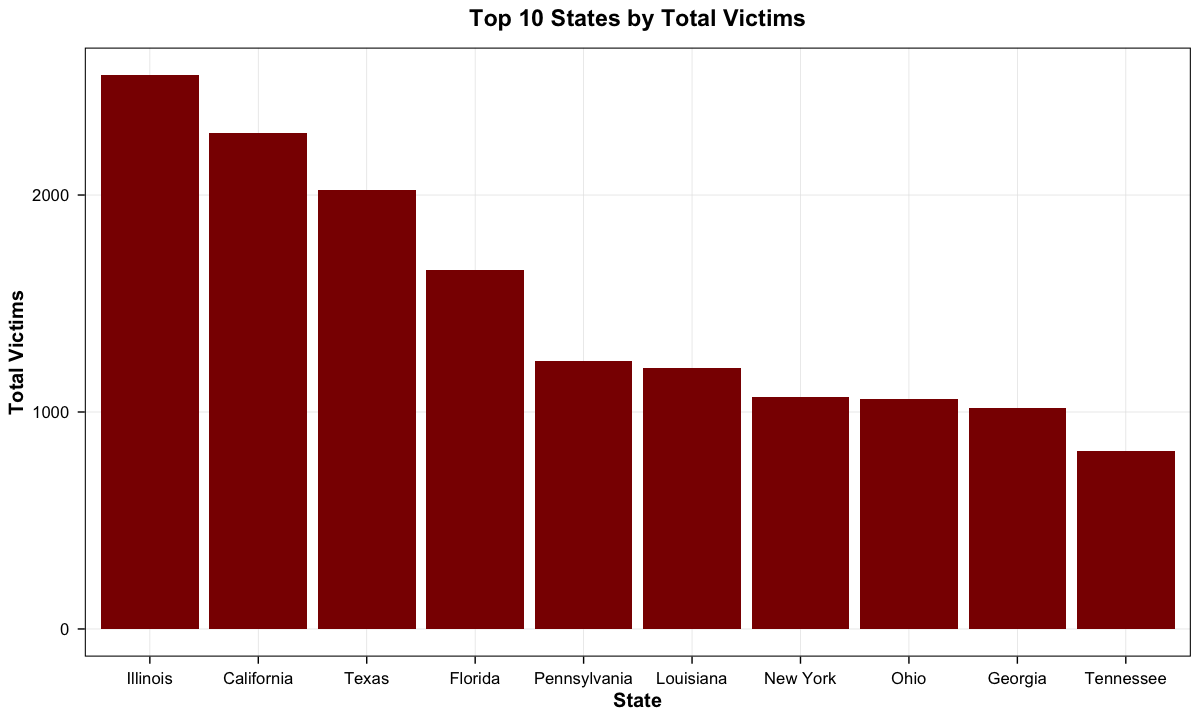

In [102]:
# aggregate victims by state
state_totals <- df_mass %>%
  group_by(State) %>%
  summarise(Victims.Total = sum(Victims.Total, na.rm = TRUE)) %>%
  arrange(desc(Victims.Total)) %>%
  slice_head(n = 10)   # top 10 states

# plot top 10 states by total victims
options(repr.plot.width = 10, repr.plot.height = 6)

states_plot <- ggplot(state_totals, aes(x = reorder(State, -Victims.Total), y = Victims.Total)) +
    geom_bar(stat = "identity", fill = "darkred") +
  coord_cartesian(ylim = c(0, NA)) +
  theme_minimal() +
  theme(panel.grid.major = element_line(colour = "grey90", linewidth = 0.2),
        panel.grid.minor = element_blank(),
        panel.background = element_rect(fill = "white", colour = NA),
        panel.border = element_rect(colour = "black", linewidth = 0.6, fill = NA),
        axis.ticks = element_line(colour = "black", linewidth = 0.4),
        axis.ticks.length = unit(0.15, "cm"),
        axis.text = element_text(size = 10, colour = "black"),
        axis.title = element_text(size = 12, face = "bold"),
        plot.title = element_text(size = 14, face = "bold", hjust = 0.5, margin = margin(b = 10)),
        legend.position = "top",
        legend.title = element_text(size = 10, face = "bold"),
        legend.text = element_text(size = 9)) +
    labs(title = "Top 10 States by Total Victims",
       x = "State",
       y = "Total Victims")

states_plot

In [105]:
summary(df_mass)

  Incident.ID      Incident.Date           State           City.Or.County    
 Min.   :  92194   Min.   :2014-01-01   Length:5183        Length:5183       
 1st Qu.: 986164   1st Qu.:2017-11-09   Class :character   Class :character  
 Median :1830875   Median :2020-10-18   Mode  :character   Mode  :character  
 Mean   :1720517   Mean   :2020-04-29                                        
 3rd Qu.:2431332   3rd Qu.:2022-10-01                                        
 Max.   :3150525   Max.   :2024-12-31                                        
   Address          Victims.Killed   Victims.Injured  Suspects.Killed  
 Length:5183        Min.   : 0.000   Min.   :  0.00   Min.   :0.00000  
 Class :character   1st Qu.: 0.000   1st Qu.:  3.00   1st Qu.:0.00000  
 Mode  :character   Median : 1.000   Median :  4.00   Median :0.00000  
                    Mean   : 1.011   Mean   :  4.16   Mean   :0.06135  
                    3rd Qu.: 1.000   3rd Qu.:  5.00   3rd Qu.:0.00000  
                    Ma

### Confidence Intervals / Bootstrapping
#### CI for average incidents per year

In [127]:
# get yearly incident counts
year_freq <- table(df_mass$Year)
year_counts_vec <- as.numeric(year_freq)

# observed mean
observed_mean <- mean(year_counts_vec)

# bootstrap procedure
set.seed(123)   # reproducibility
n_boot <- 10000
boot_means <- replicate(n_boot, mean(sample(year_counts_vec, replace = TRUE)))

# 95% confidence interval
ci <- quantile(boot_means, probs = c(0.025, 0.975))

# results
observed_mean
ci

[1] 471.1818

2.5%    97.5% 
387.3636 558.2750

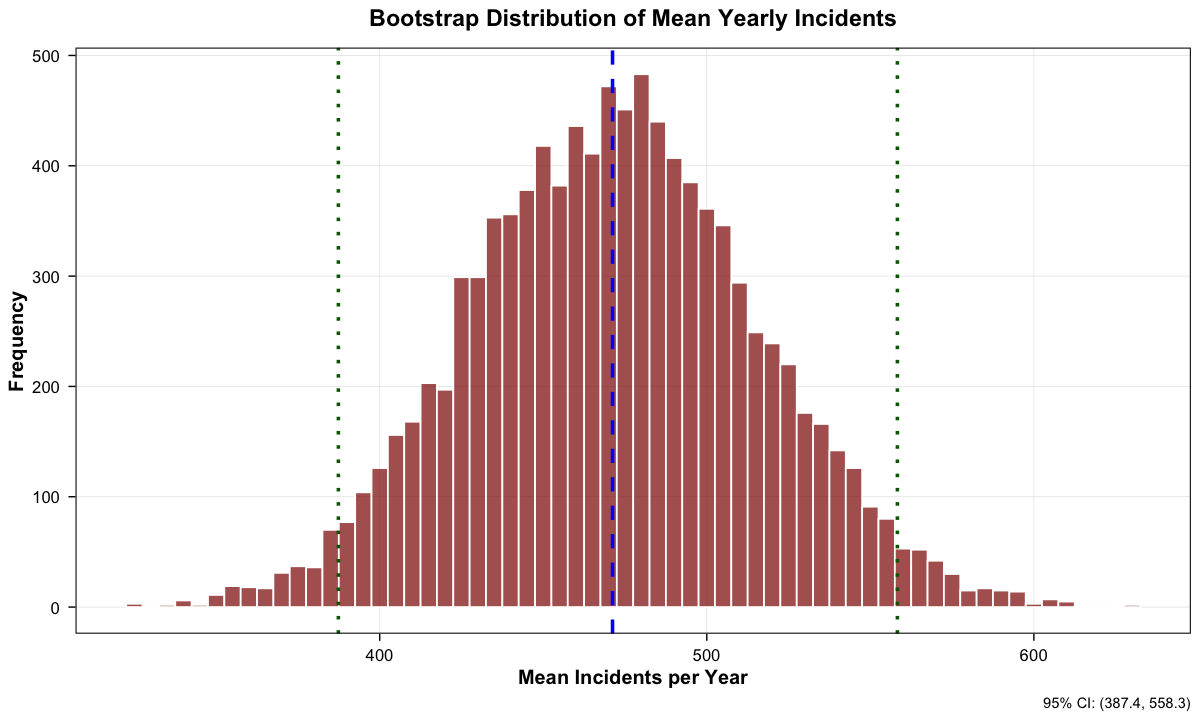

In [131]:
boot_df <- data.frame(boot_means = boot_means)

ggplot(boot_df, aes(x = boot_means)) +
    geom_histogram(binwidth = 5, fill = "darkred", color = "white", alpha = 0.7) +
    geom_vline(xintercept = observed_mean, color = "blue", linetype = "dashed", linewidth = 1) +
    geom_vline(xintercept = ci[1], color = "darkgreen", linetype = "dotted", linewidth = 1) +
    geom_vline(xintercept = ci[2], color = "darkgreen", linetype = "dotted", linewidth = 1) +
    labs(title = "Bootstrap Distribution of Mean Yearly Incidents",
        x = "Mean Incidents per Year",
        y = "Frequency",
        caption = paste0("95% CI: (", round(ci[1],1), ", ", round(ci[2],1), ")")) +
    theme_minimal()+
    theme(panel.grid.major = element_line(colour = "grey90", linewidth = 0.2),
            panel.grid.minor = element_blank(),
            panel.background = element_rect(fill = "white", colour = NA),
            panel.border = element_rect(colour = "black", linewidth = 0.6, fill = NA),
            axis.ticks = element_line(colour = "black", linewidth = 0.4),
            axis.ticks.length = unit(0.15, "cm"),
            axis.text = element_text(size = 10, colour = "black"),
            axis.title = element_text(size = 12, face = "bold"),
            plot.title = element_text(size = 14, face = "bold", hjust = 0.5, margin = margin(b = 10)),
            legend.position = "top",
            legend.title = element_text(size = 10, face = "bold"),
            legend.text = element_text(size = 9))

- On average, there are about 471 mass shooting incidents per year in the U.S. over 2014–2024.

- The confidence interval tells us that the “true” average (if we could observe many decades) is plausibly between ~387 and ~558 incidents per year.

- This range reflects the variability across years — some years are lower (2014–2016), others much higher (2020–2022).

### Hypothesis Testing 
#### chi-squared test for seasonal variation (are incidents evenly distributed?)

In [133]:
# frequency of incidents by season
season_freq <- table(df_mass$Season)

# chi-squared goodness-of-fit test
chisq_test <- chisq.test(season_freq)

# standardized residuals
std_resid <- chisq_test$stdres

# results
season_freq
chisq_test
std_resid


Spring Summer   Fall Winter 
  1524   1657   1107    895 


	Chi-squared test for given probabilities

data:  season_freq
X-squared = 292.36, df = 3, p-value < 2.2e-16



    Spring     Summer       Fall     Winter 
  7.321828  11.588217  -6.054743 -12.855302 

- The p-value is far below 0.001, so you reject the null hypothesis that incidents are evenly distributed across seasons.

- Summer has substantially more incidents than expected, while Winter has substantially fewer.

- Spring is also above expectation, Fall below, but the biggest contributors to the chi-squared statistic are Summer (positive deviation) and Winter (negative deviation).

- Spring: +7.32 → significantly more incidents than expected.

- Summer: +11.59 → far more incidents than expected, the strongest positive contributor.

- Fall: −6.05 → significantly fewer incidents than expected.

- Winter: −12.86 → far fewer incidents than expected, the strongest negative contributor.